In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')




# Examining the diffusion connectivity network

In [1]:
import sys
sys.path.append('../../')

In [2]:
from codes.docs.analysis import graph_analysis, data_preprocessing

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import pickle
import pandas as pd
%matplotlib inline

In [5]:
european_diffusion_matrix_preterm=np.load('./preprocessed_data/diffusion/preterm/european_diffusion_matrix.npy')
european_diffusion_PRS_schizophrenia_preterm=np.load('./preprocessed_data/diffusion/preterm/european_diffusion_PRS_schizophrenia.npy')
adjusted_european_diffusion_matrix_preterm=np.load('./preprocessed_data/diffusion/preterm/adjusted_european_diffusion_matrix.npy')
adjusted_european_diffusion_PRS_schizophrenia_preterm=np.load('./preprocessed_data/diffusion/preterm/adjusted_european_diffusion_PRS_schizophrenia.npy')


european_diffusion_matrix_term=np.load('./preprocessed_data/diffusion/term/european_diffusion_matrix.npy')
european_diffusion_PRS_schizophrenia_term=np.load('./preprocessed_data/diffusion/term/european_diffusion_PRS_schizophrenia.npy')
adjusted_european_diffusion_matrix_term=np.load('./preprocessed_data/diffusion/term/adjusted_european_diffusion_matrix.npy')
adjusted_european_diffusion_PRS_schizophrenia_term=np.load('./preprocessed_data/diffusion/term/adjusted_european_diffusion_PRS_schizophrenia.npy')


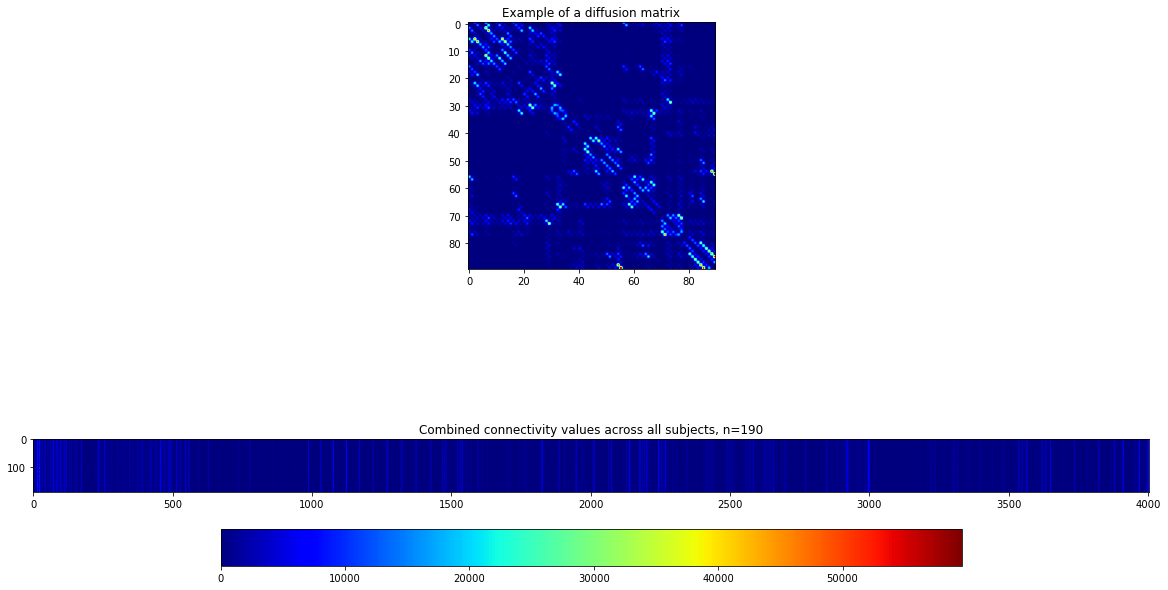

In [14]:
fig,ax=plt.subplots(2,1,figsize=(20,10))
im1=ax[0].imshow(data_preprocessing.reverse_lower_triangle(european_diffusion_matrix[0]),cmap='jet')
ax[0].set_title('Example of a diffusion matrix')
im2=ax[1].imshow(european_diffusion_matrix,cmap='jet')
ax[1].set_title('Combined connectivity values across all subjects, n=190')
fig.colorbar(im1,orientation='horizontal')
fig.show()

removing the zero connections. 

In [4]:
features_to_be_removed=np.asarray([i for i in range(0,4005) if len(np.where(european_diffusion_matrix[:,i]==0)[0])/european_diffusion_matrix.shape[0] > 0])

In [5]:
print('number of non-zero features are %s'%(4005-features_to_be_removed.shape[0]))

number of non-zero features are 2482


## 2.1 Network metrics analysis

In [8]:
#Dividing the data set into high and low risk
#get the indices of the low and high risk
    #preterm    
for i in range(11):
    low_risk_preterm,high_risk_preterm=data_preprocessing.high_low_risk_divide(european_diffusion_PRS_schizophrenia_preterm[:,i],bins=100,percentage=0.3)
    X_low_risk_preterm=adjusted_european_diffusion_matrix_preterm[low_risk_preterm,:]
    X_high_risk_preterm=adjusted_european_diffusion_matrix_preterm[high_risk_preterm,:]

    X_preterm=np.vstack((X_low_risk_preterm,X_high_risk_preterm))
    X_preterm=StandardScaler().fit_transform(X_preterm)
    y_preterm=np.concatenate((np.zeros(X_low_risk_preterm.shape[0]),np.ones(X_high_risk_preterm.shape[0])))

    print('low risk preterm shape',low_risk_preterm.shape)
    print('high risk preterm shape',high_risk_preterm.shape)

    low_risk_term,high_risk_term=data_preprocessing.high_low_risk_divide(european_diffusion_PRS_schizophrenia_term[:,i],bins=100,percentage=0.3)
    X_low_risk_term=adjusted_european_diffusion_matrix_term[low_risk_term,:]
    X_high_risk_term=adjusted_european_diffusion_matrix_term[high_risk_term,:]

    X_term=np.vstack((X_low_risk_term,X_high_risk_term))
    X_term=StandardScaler().fit_transform(X_term)
    y_term=np.concatenate((np.zeros(X_low_risk_term.shape[0]),np.ones(X_high_risk_term.shape[0])))

    print('low risk term shape',low_risk_term.shape)
    print('high risk term shape',high_risk_term.shape)

    np.save('./preprocessed_data/diffusion/preterm/high_low_risk_diffusion_preterm_dataset_PRS%d.npy'%i,X_preterm)
    np.save('./preprocessed_data/diffusion/preterm/high_low_risk_diffusion_preterm_dataset_PRS%d_label.npy'%i,y_preterm)
    np.save('./preprocessed_data/diffusion/term/high_low_risk_diffusion_term_dataset_PRS%d.npy'%i,X_term)
    np.save('./preprocessed_data/diffusion/term/high_low_risk_diffusion_term_dataset_PRS%d_label.npy'%i,y_term)

low risk preterm shape (11,)
high risk preterm shape (11,)
low risk term shape (46,)
high risk term shape (46,)
low risk preterm shape (11,)
high risk preterm shape (11,)
low risk term shape (45,)
high risk term shape (50,)
low risk preterm shape (11,)
high risk preterm shape (11,)
low risk term shape (46,)
high risk term shape (48,)
low risk preterm shape (11,)
high risk preterm shape (11,)
low risk term shape (45,)
high risk term shape (47,)
low risk preterm shape (11,)
high risk preterm shape (12,)
low risk term shape (50,)
high risk term shape (50,)
low risk preterm shape (11,)
high risk preterm shape (11,)
low risk term shape (46,)
high risk term shape (47,)
low risk preterm shape (12,)
high risk preterm shape (11,)
low risk term shape (45,)
high risk term shape (49,)
low risk preterm shape (11,)
high risk preterm shape (11,)
low risk term shape (46,)
high risk term shape (45,)
low risk preterm shape (11,)
high risk preterm shape (11,)
low risk term shape (47,)
high risk term shap

In [9]:
X_mean_connectivity_low_risk=np.mean(X[y==0],axis=0)
X_mean_connectivity_high_risk=np.mean(X[y==1],axis=0)

### 2.2 Visualising

In [6]:
AAL_label=np.load('./preprocessed_data/diffusion/AAL_label.npy')

In [7]:
#rearrange the matrix by side
right_indices=np.array([idx for idx,i in enumerate(AAL_label) if '_R' in i])
print(right_indices.shape)
left_indices=np.array([idx for idx,i in enumerate(AAL_label) if '_L' in i])
left_indices=np.delete(left_indices,np.where(left_indices==69)[0])#removed the paracentral_lobuble_r
print(left_indices.shape)
rearrange_by_side_indices=np.concatenate((right_indices,left_indices),axis=0)

(45,)
(45,)


In [8]:
X_mean_connectivity_low_risk=data_preprocessing.reverse_lower_triangle(X_mean_connectivity_low_risk)
X_mean_connectivity_high_risk=data_preprocessing.reverse_lower_triangle(X_mean_connectivity_high_risk)

In [9]:
rearranged_mean_connectivity_low_risk=np.asarray([[X_mean_connectivity_low_risk[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

rearranged_mean_connectivity_high_risk=np.asarray([[X_mean_connectivity_high_risk[i][j] for j in rearrange_by_side_indices] for i in rearrange_by_side_indices])

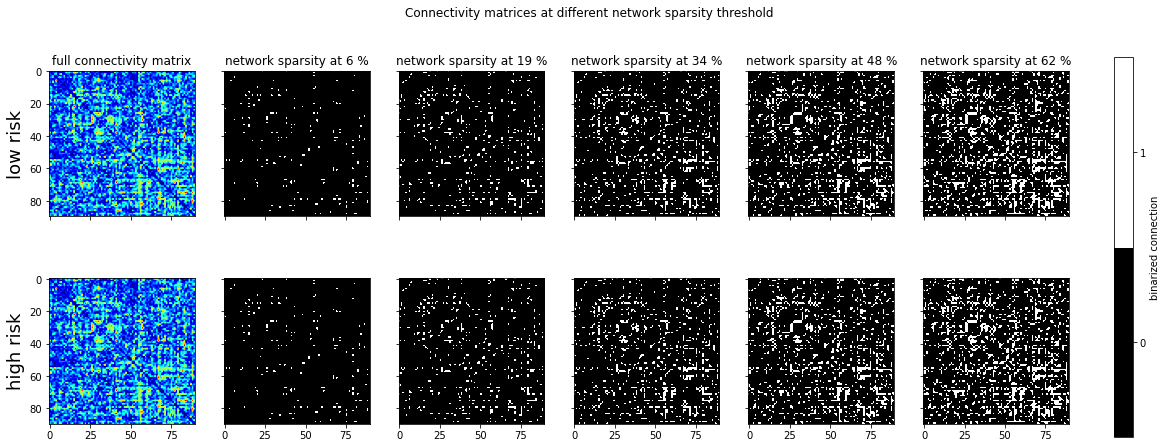

In [10]:
f,axes=plt.subplots(2,6,sharex=True,sharey=True,figsize=(20,7))
network_sparsity_threshold=[int(i) for i in (np.linspace(2,20,5))]
for idx,ax in enumerate(axes[0]):
    if idx==0:
        im=ax.imshow(abs(rearranged_mean_connectivity_low_risk),cmap='jet')
        ax.set_title('full connectivity matrix')
        ax.set_ylabel('low risk',fontsize=18)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(abs(rearranged_mean_connectivity_low_risk),network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        ax.set_title('network sparsity at %d %%'%(len(np.where(data_preprocessing.lower_triangle(binarized_matrix)==1)[0])*100/(52*51/2)))
        im.set_clim(-0.5,1.5)
for idx,ax in enumerate(axes[1]):
    if idx==0:
        im=ax.imshow(abs(rearranged_mean_connectivity_high_risk),cmap='jet')
        ax.set_ylabel('high risk',fontsize=18)
    else:
        binarized_matrix=graph_analysis.binarize_matrix_based_on_sparsity_threshold(abs(rearranged_mean_connectivity_high_risk),network_sparsity_threshold[idx-1]/100,bins=100)
        im=ax.imshow(binarized_matrix,cmap=plt.cm.get_cmap('cubehelix', 2))
        im.set_clim(-0.5,1.5)

f.suptitle('Connectivity matrices at different network sparsity threshold')
f.colorbar(im,ax=np.concatenate(axes),ticks=range(2),label='binarized connection',fraction=0.046, pad=0.04)

### 2.3. Network metrics

In [5]:
#run executable_script/perm_graph_network.py to calculate 1000 permuted network metrics.
import glob
import tqdm
diffusion_vol_dict_preterm=dict()
diffusion_vol_dict_term=dict()
for i in tqdm.tqdm(range(11)):
    obsv_high_preterm=np.loadtxt('./log/diffusion/preterm/PRS%d/obsv_graph_metrics_diffusion_high_risk_preterm_PRS%d.txt'%(i,i))
    obsv_low_preterm=np.loadtxt('./log/diffusion/preterm/PRS%d/obsv_graph_metrics_diffusion_low_risk_preterm_PRS%d.txt'%(i,i))
    diffusion_vol_dict_preterm['PRS%d'%i]={'obsv_high':obsv_high_preterm,
    'obsv_low':obsv_low_preterm}

    perm_high_preterm,perm_low_preterm=graph_analysis.preprocess_perm_graph_results(shape=(-1,30,5),high_risk=sorted(glob.glob('./log/diffusion/preterm/PRS%d/perm_*high*run*'%i)),low_risk=sorted(glob.glob('./log/diffusion/preterm/PRS%d/perm_*low*run*'%i)))

    diffusion_vol_dict_preterm['PRS%d'%i]['perm_high']=perm_high_preterm[:1000]
    diffusion_vol_dict_preterm['PRS%d'%i]['perm_low']=perm_low_preterm[:1000]
    diffusion_vol_dict_preterm['PRS%d'%i]['p_value']=graph_analysis.calculate_perm_p_value(obsv_high_preterm,obsv_low_preterm,perm_high_preterm,perm_low_preterm)
#########################################
    obsv_high_term=np.loadtxt('./log/diffusion/term/PRS%d/obsv_graph_metrics_diffusion_high_risk_term_PRS%d.txt'%(i,i))
    obsv_low_term=np.loadtxt('./log/diffusion/term/PRS%d/obsv_graph_metrics_diffusion_low_risk_term_PRS%d.txt'%(i,i))
    
    diffusion_vol_dict_term['PRS%d'%i]={'obsv_high':obsv_high_term,
    'obsv_low':obsv_low_term}

    perm_high_term,perm_low_term=graph_analysis.preprocess_perm_graph_results(shape=(-1,30,5),high_risk=sorted(glob.glob('./log/diffusion/term/PRS%d/perm_*high*run*'%i)),low_risk=sorted(glob.glob('./log/diffusion/term/PRS%d/perm_*low*run*'%i)))

    diffusion_vol_dict_term['PRS%d'%i]['perm_high']=perm_high_term[:1000]
    diffusion_vol_dict_term['PRS%d'%i]['perm_low']=perm_low_term[:1000]

    diffusion_vol_dict_term['PRS%d'%i]['p_value']=graph_analysis.calculate_perm_p_value(obsv_high_term,obsv_low_term,perm_high_term,perm_low_term)


100%|██████████| 11/11 [00:13<00:00,  1.25s/it]


In [15]:

for i in range(11):
    print('for PRS%d:'%i)
    # print(np.where(diffusion_vol_dict_preterm['PRS%d'%i]['p_value']<=0.025))
    print(np.where(diffusion_vol_dict_term['PRS%d'%i]['p_value']<=0.025))

for PRS0:
(array([ 0,  0,  2,  2,  3,  7, 14]), array([2, 4, 2, 4, 3, 3, 3]))
for PRS1:
(array([0, 0, 1, 1, 5, 6, 7]), array([2, 4, 2, 4, 3, 3, 3]))
for PRS2:
(array([0, 0, 1, 1]), array([2, 4, 2, 4]))
for PRS3:
(array([0, 0, 3, 3, 6, 9, 9]), array([2, 4, 2, 4, 3, 2, 4]))
for PRS4:
(array([0, 0]), array([2, 4]))
for PRS5:
(array([0, 0, 5]), array([2, 4, 3]))
for PRS6:
(array([0, 0, 6]), array([2, 4, 3]))
for PRS7:
(array([0, 0, 1, 1, 4, 4]), array([2, 4, 2, 4, 2, 4]))
for PRS8:
(array([0, 0, 4]), array([2, 4, 3]))
for PRS9:
(array([0, 0]), array([2, 4]))
for PRS10:
(array([0, 0, 6, 7]), array([2, 4, 3, 3]))


Text(0.5, 0.98, 'Network measurements of preterm neonates with Diffusion Atlas')

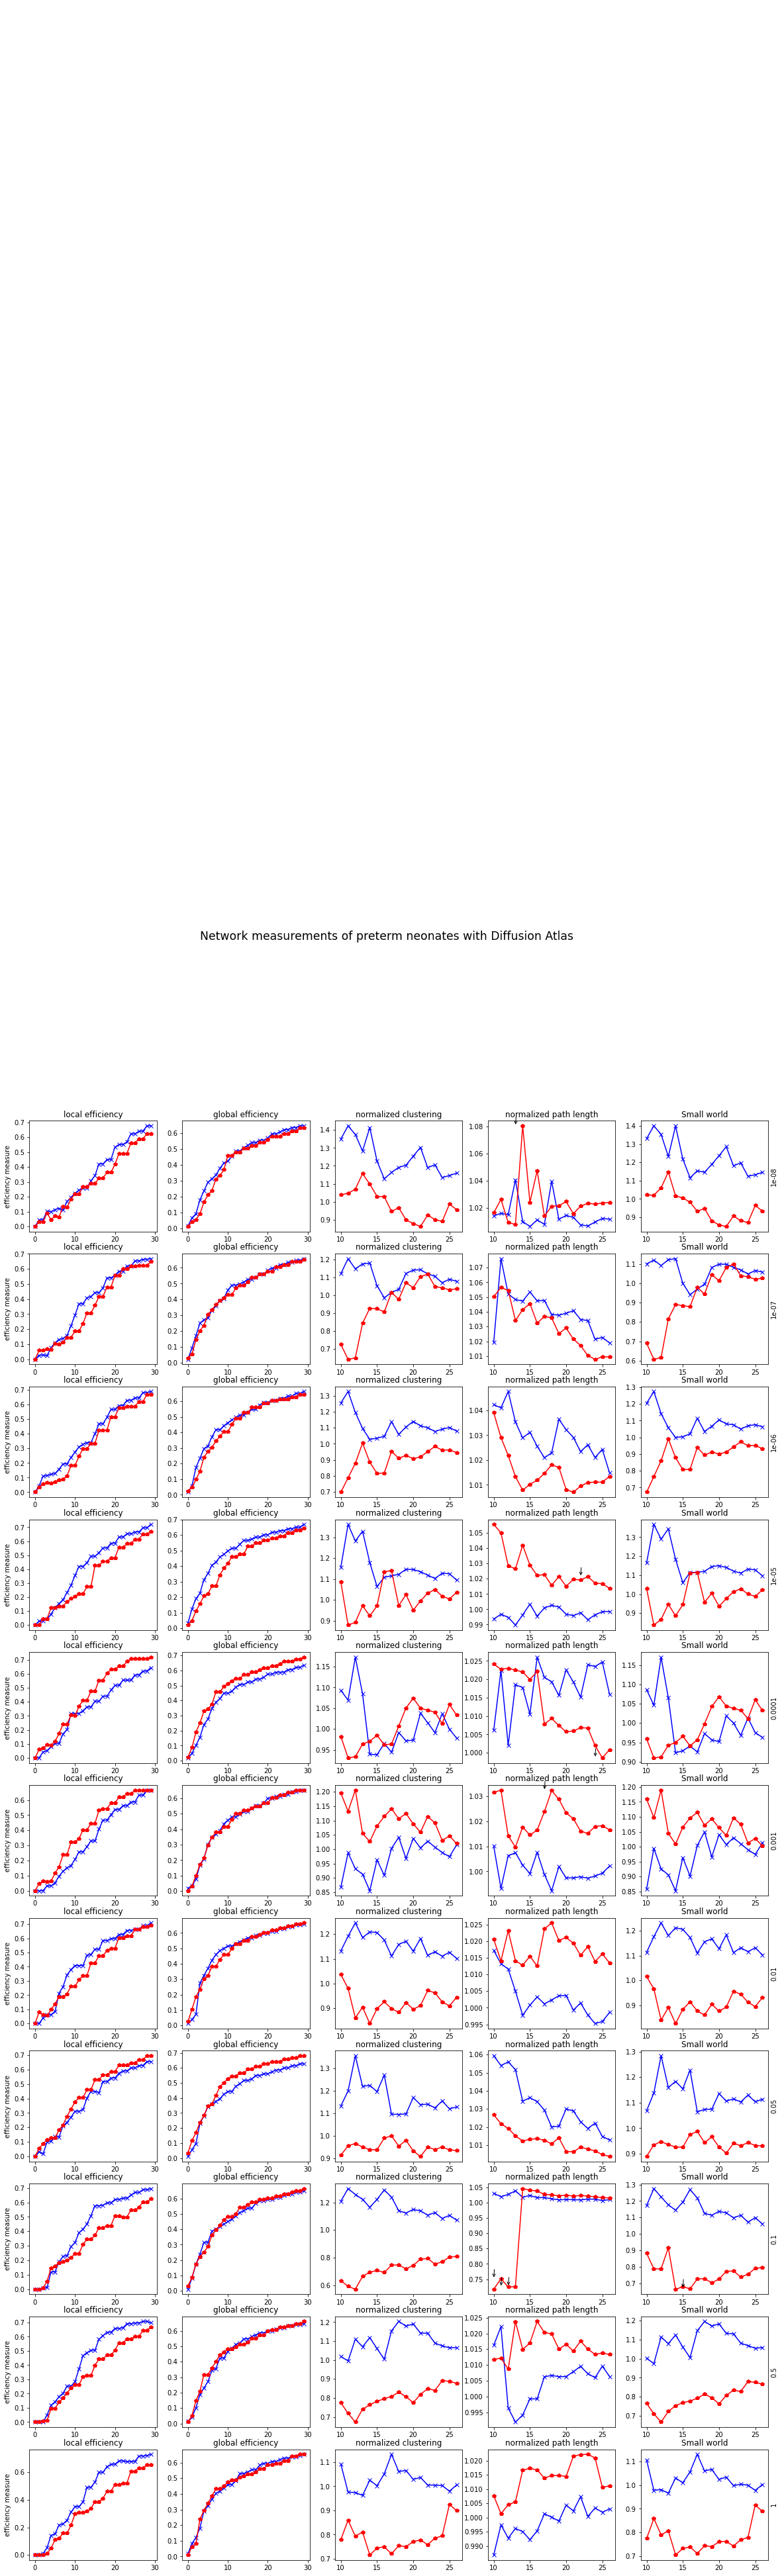

In [10]:
f,axes= plt.subplots(11,5,figsize=(20,40))
titles=['local efficiency','global efficiency','normalized clustering','normalized path length','Small world']
PRS_scores=['1e-08','1e-07','1e-06', '1e-05', '0.0001', '0.001', '0.01', '0.05', '0.1', '0.5', '1']
for i in range(11):
    for n in range(5):
        sig_indices=np.where(diffusion_vol_dict_preterm['PRS%d'%i]['p_value'][:,n]<=0.025)[0]
        obsv_low=diffusion_vol_dict_preterm['PRS%d'%i]['obsv_low']
        obsv_high=diffusion_vol_dict_preterm['PRS%d'%i]['obsv_high']
        if n>1:
            axes[i][n].plot(np.linspace(10,26,17),obsv_low[9:26,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(np.linspace(10,26,17),obsv_high[9:26,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                if idx==0:
                    continue
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
            if n==4:
                axes[i][n].yaxis.set_label_position("right")
                axes[i][n].set_ylabel(PRS_scores[i])

        else:
            if n==0:
                axes[i][n].set_ylabel('efficiency measure')

            axes[i][n].plot(obsv_low[:,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(obsv_high[:,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))

        axes[i][n].set_title(titles[n])
f.suptitle('Network measurements of preterm neonates with Diffusion Atlas',fontsize='xx-large')

Text(0.5, 0.98, 'Network measurements of term neonates with Diffusion Atlas')

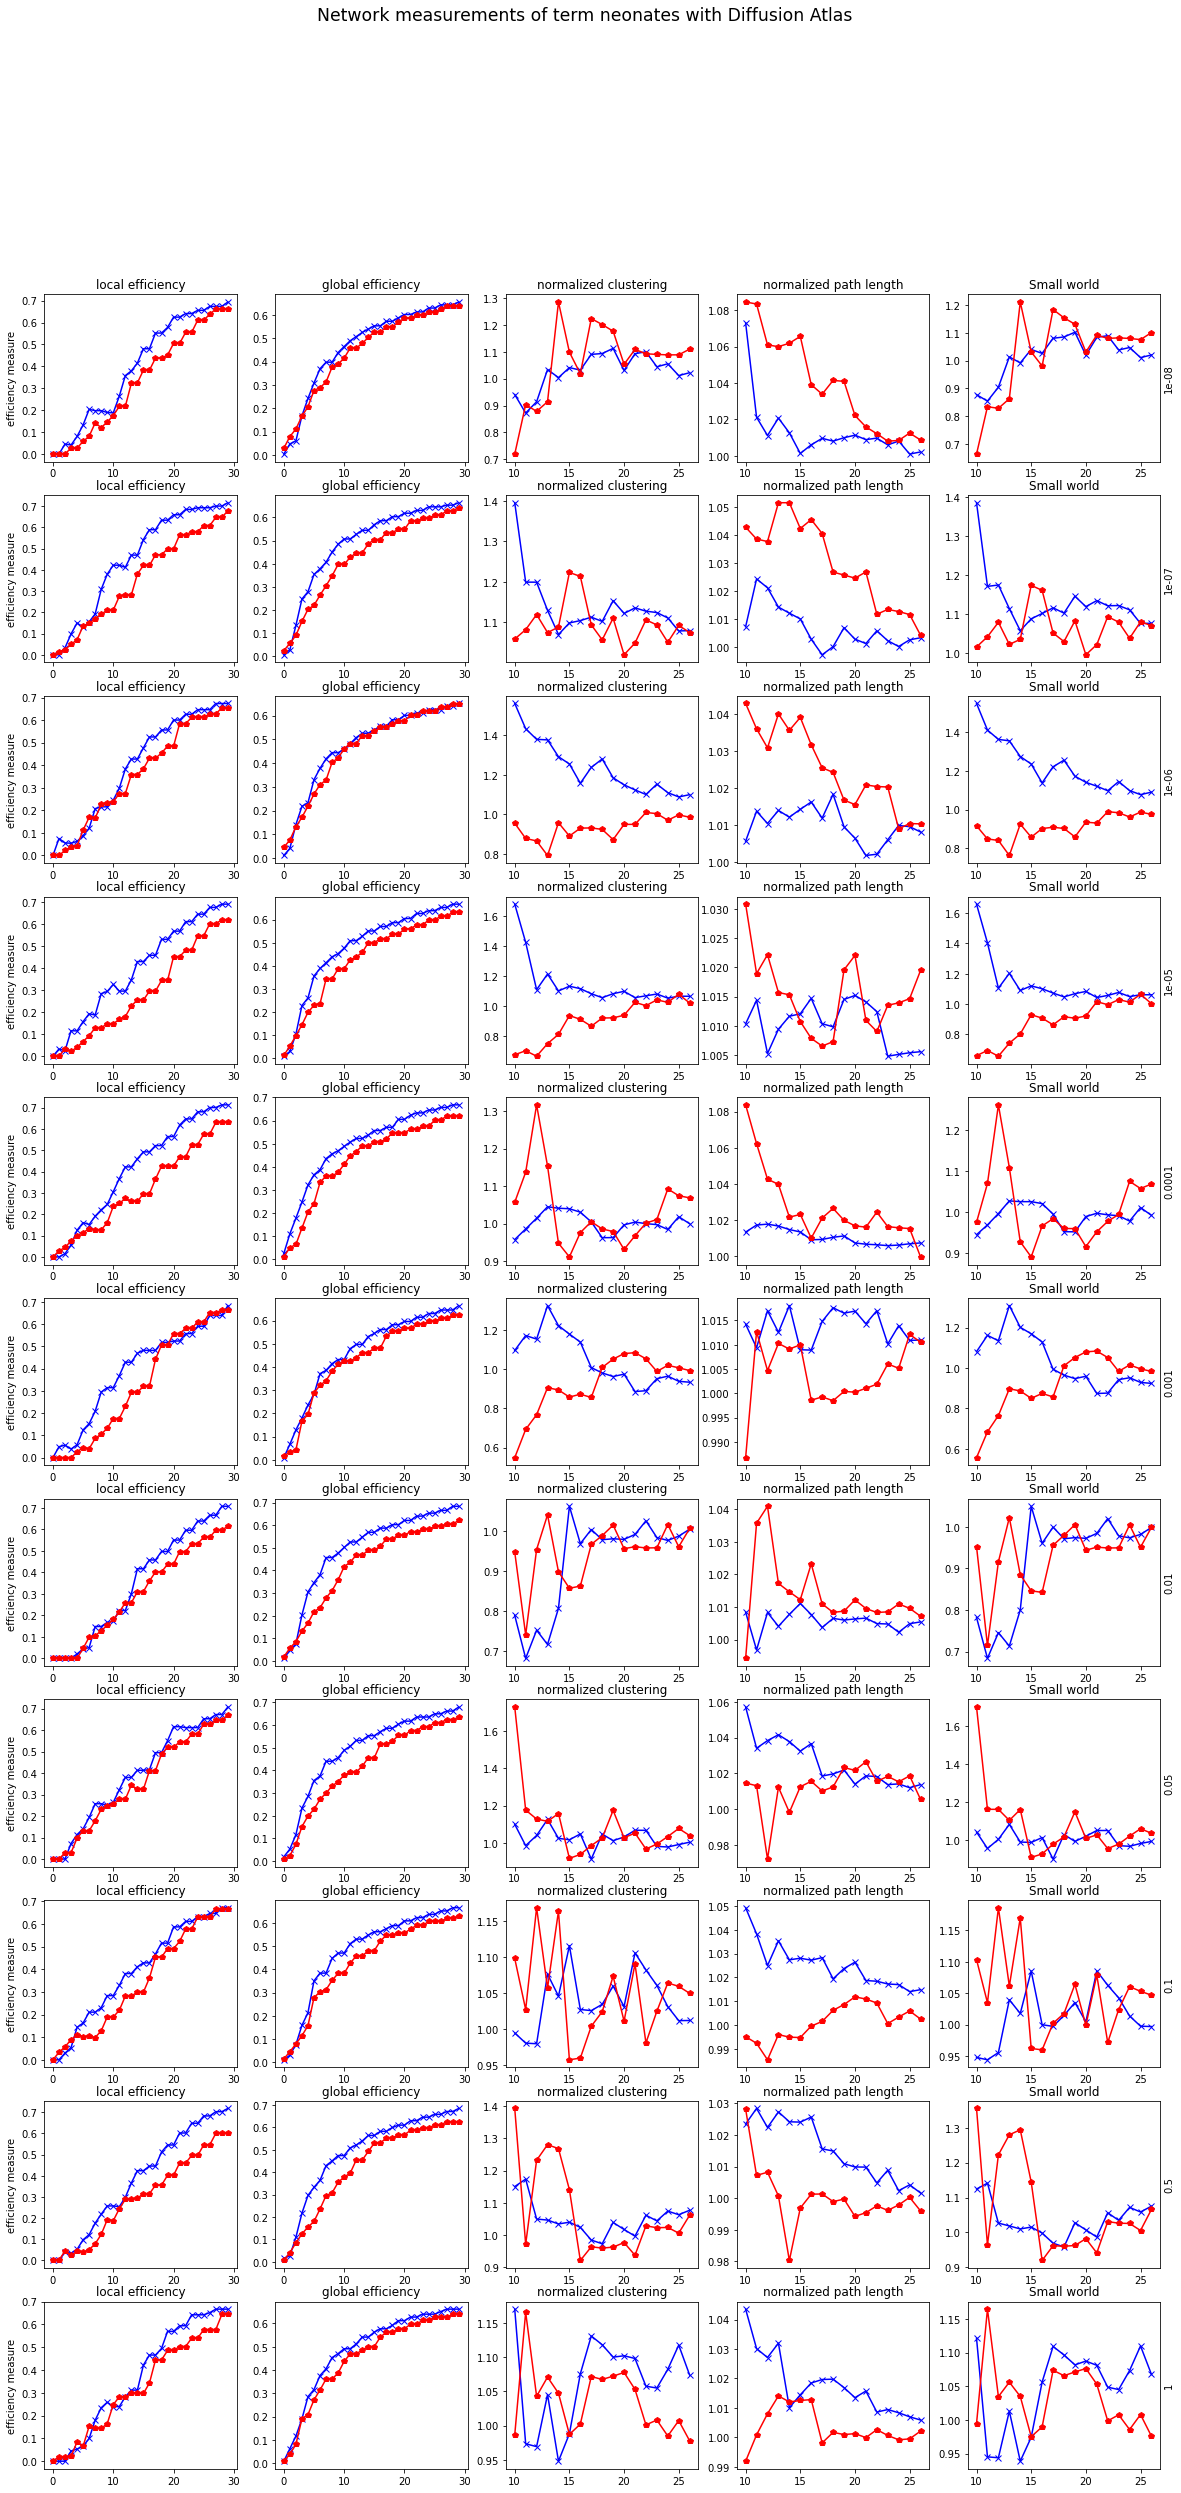

In [14]:
f,axes= plt.subplots(11,5,figsize=(20,40))
titles=['local efficiency','global efficiency','normalized clustering','normalized path length','Small world']
PRS_scores=['1e-08','1e-07','1e-06', '1e-05', '0.0001', '0.001', '0.01', '0.05', '0.1', '0.5', '1']
for i in range(11):
    for n in range(5):
        sig_indices=np.where(diffusion_vol_dict_term['PRS%d'%i]['p_value'][:,n]<=0.025)[0]
        obsv_low=diffusion_vol_dict_term['PRS%d'%i]['obsv_low']
        obsv_high=diffusion_vol_dict_term['PRS%d'%i]['obsv_high']
        if n>1:
            axes[i][n].plot(np.linspace(10,26,17),obsv_low[9:26,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(np.linspace(10,26,17),obsv_high[9:26,n],'p-',color='red',label='high risk')
            # for idx in sig_indices:
            #     if idx==0:
            #         continue
            #     axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),arrowprops=dict(arrowstyle='->'))
            if n==4:
                axes[i][n].yaxis.set_label_position("right")
                axes[i][n].set_ylabel(PRS_scores[i])

        else:
            if n==0:
                axes[i][n].set_ylabel('efficiency measure')

            axes[i][n].plot(obsv_low[:,n],'x-',color='blue',label='low risk')
            axes[i][n].plot(obsv_high[:,n],'p-',color='red',label='high risk')
            for idx in sig_indices:
                axes[i][n].annotate(' ',xy=(idx,obsv_high[:,n][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))

        axes[i][n].set_title(titles[n])
f.suptitle('Network measurements of term neonates with Diffusion Atlas',fontsize='xx-large')

Text(0.5, 0.98, 'Network measurements of diffusion dataset')

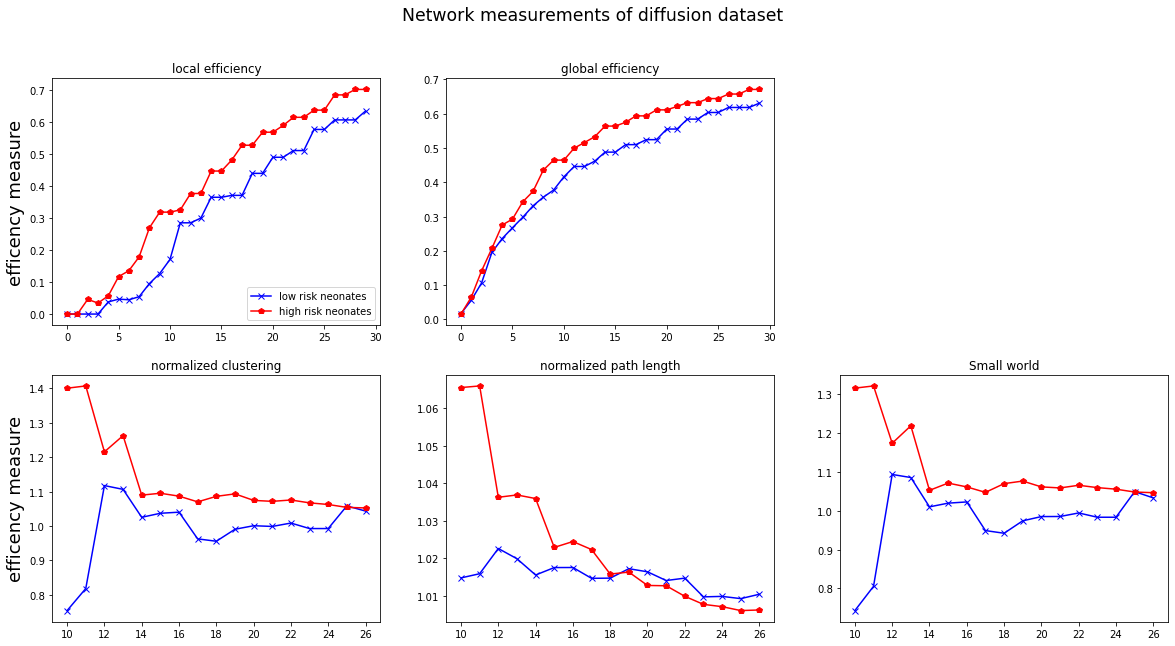

In [29]:
##############LOCAL EFFICIENCY############################
f,axes=plt.subplots(2,3,figsize=(20,10))
axes[0][0].plot(obsv_low[:,0],'x-',color='blue',label='low risk neonates')
axes[0][0].plot(obsv_high[:,0],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_local_eff:
#     axes[0][0].annotate(' ',xy=(idx,obsv_high_preterm[:,0][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[0][0].legend(loc='lower right')
axes[0][0].set_title('local efficiency')
axes[0][0].set_ylabel('efficency measure',fontsize=18)
##############GLOBAL EFFICIENCY############################
axes[0][1].plot(obsv_low[:,1],'x-',color='blue',label='low risk neonates')
axes[0][1].plot(obsv_high[:,1],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_global_eff:
#     axes[0][1].annotate(' ',xy=(idx,obsv_high_preterm[:,1][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[0][1].set_title('global efficiency')
# axes[0][1].set_ylabel('efficency measure',fontsize=18)
##############NORMALIZED CLUSTERING############################
axes[1][0].plot(np.linspace(10,26,17),obsv_low[9:26,2],'x-',color='blue',label='low risk neonates')
axes[1][0].plot(np.linspace(10,26,17),obsv_high[9:26,2],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_clus_eff:
#     if idx==0:
#         continue
#     axes[1][0].annotate(' ',xy=(idx,obsv_high_preterm[:,2][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
axes[1][0].set_title('normalized clustering')
axes[1][0].set_ylabel('efficency measure',fontsize=18)
# ##############NORMALIZED PATH############################
axes[1][1].plot(np.linspace(10,26,17),obsv_low[9:26,3],'x-',color='blue',label='low risk neonates')
axes[1][1].plot(np.linspace(10,26,17),obsv_high[9:26,3],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_path_eff:
#     if idx==0:
#         continue
#     axes[1][1].annotate(' ',xy=(idx,obsv_high_preterm[:,3][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][1].set_title('normalized path length')
# axes[1][1].set_ylabel('efficency measure',fontsize=18)
##############SMALL WORDNESS############################
axes[1][2].plot(np.linspace(10,26,17),obsv_low[9:26,4],'x-',color='blue',label='low risk neonates')
axes[1][2].plot(np.linspace(10,26,17),obsv_high[9:26,4],'p-',color='red',label='high risk neonates')
# for idx in sig_indices_small_eff:
#     if idx==0:
#         continue
#     axes[1][2].annotate(' ',xy=(idx,obsv_high[:,4][idx]),xytext=(0,20),textcoords='offset pixels',arrowprops=dict(arrowstyle='->'))
# axes[0][1].legend(loc='bottom right')
axes[1][2].set_title('Small world')
# axes[1][2].set_ylabel('efficency measure',fontsize=18)

f.delaxes(ax=axes[0,2])
f.suptitle('Network measurements of diffusion dataset',fontsize='xx-large')